Import Libraries

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [25]:
# -------------------------------
# Re-define X_train, y_train before SMOTE
# -------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_csv(r"C:\Users\hima0\Downloads\project-data-2d.csv")
df = df.replace(["NA", "NA ", "NA    ", ""], np.nan)

# 2. Encode categorical variables
if 'sex' in df.columns:
    df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['category'] = LabelEncoder().fit_transform(df['category'])

# 3. Convert all to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# 5. Features & Target
X = df.drop("category", axis=1)
y = df["category"]

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(" Train-test split done. Now X_train and y_train exist.")


 Train-test split done. Now X_train and y_train exist.


Apply SMOTE to Balance Dataset

In [10]:
# Oversample minority classes using SMOTE


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: category
3    426
0     24
2     19
1     17
4      6
Name: count, dtype: int64
After SMOTE: category
1    426
3    426
0    426
2    426
4    426
Name: count, dtype: int64


Retrain Best Model (Random Forest) with SMOTE Data

In [13]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train_res, y_train_res)

y_pred_res = rf.predict(X_test)

print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_res))
print("\nClassification Report:\n", classification_report(y_test, y_pred_res, zero_division=0))


Accuracy after SMOTE: 0.926829268292683

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         4
           2       0.50      0.40      0.44         5
           3       0.96      0.99      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.90      0.93      0.91       123



Hyperparameter Tuning (Random Forest)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score (CV): 0.9892018779342724

Accuracy (Tuned RF): 0.926829268292683
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         4
           2       0.50      0.40      0.44         5
           3       0.96      0.99      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.90      0.93      0.91       123



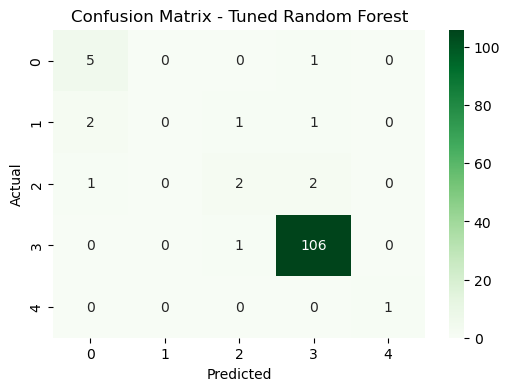

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)

# Evaluate tuned model
best_rf = grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\nAccuracy (Tuned RF):", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned, zero_division=0))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save Improved Model

In [24]:
joblib.dump(best_rf, "best_liver_disease_model_improved.pkl")
print(" Improved Model Saved")

 Improved Model Saved


Before SMOTE:
 category
3    426
0     24
2     19
1     17
4      6
Name: count, dtype: int64

After SMOTE:
 category
1    426
3    426
0    426
2    426
4    426
Name: count, dtype: int64

 Random Forest After SMOTE:
Accuracy: 0.926829268292683
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         4
           2       0.50      0.40      0.44         5
           3       0.96      0.99      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.90      0.93      0.91       123



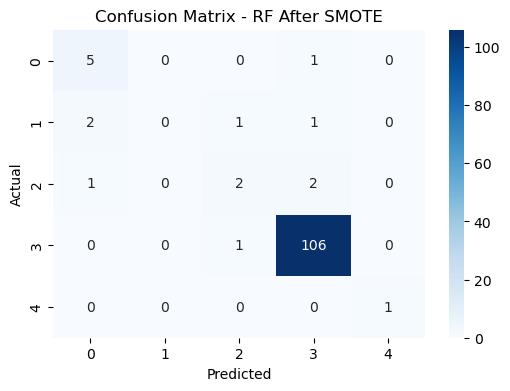


 Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
 Best Cross-Validation Score: 0.9892018779342724

 Tuned Random Forest Results:
Accuracy: 0.926829268292683
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.00      0.00      0.00         4
           2       0.50      0.40      0.44         5
           3       0.96      0.99      0.98       107
           4       1.00      1.00      1.00         1

    accuracy                           0.93       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.90      0.93      0.91       123



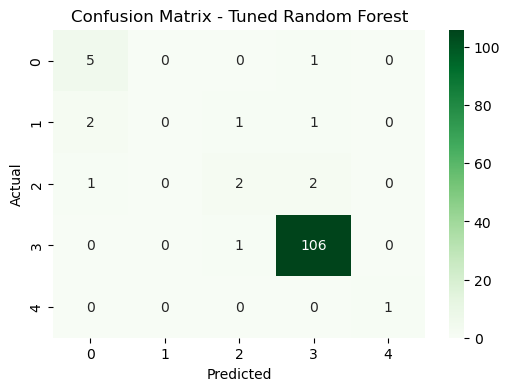


 Improved Random Forest model saved as 'best_liver_disease_model_improved.pkl'


In [2]:
# -------------------------------
# Week 5: Feedback & Improvements (One-Shot Script)
# -------------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

# 2. Load & Clean Dataset
df = pd.read_csv(r"C:\Users\hima0\Downloads\project-data-2d.csv")
df = df.replace(["NA", "NA ", "NA    ", ""], np.nan)

# Encode categorical variables
if 'sex' in df.columns:
    df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['category'] = LabelEncoder().fit_transform(df['category'])

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# 3. Features & Target
X = df.drop("category", axis=1)
y = df["category"]

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_res.value_counts())

# 7. Train Random Forest (Baseline with SMOTE data)
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train_res, y_train_res)
y_pred_res = rf.predict(X_test)

print("\n Random Forest After SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_res))
print("Classification Report:\n", classification_report(y_test, y_pred_res, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_res)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RF After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Hyperparameter Tuning (Fast GridSearch)
param_grid = {
    "n_estimators": [100, 200],   # fewer options for speed
    "max_depth": [None, 10],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("\n Best Parameters:", grid.best_params_)
print(" Best Cross-Validation Score:", grid.best_score_)

# 9. Evaluate Tuned Model
best_rf = grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\n Tuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned, zero_division=0))

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,4))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Save Improved Model
joblib.dump(best_rf, "best_liver_disease_model_improved.pkl")
print("\n Improved Random Forest model saved as 'best_liver_disease_model_improved.pkl'")


In [6]:
# -------------------------------
# Week 6: Deployment with Streamlit
# -------------------------------

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load trained model
model = joblib.load("best_liver_disease_model_improved.pkl")

# Title
st.title(" Liver Disease Prediction App")
st.write("Enter patient details below to predict liver disease category.")

# Input fields
age = st.number_input("Age", min_value=1, max_value=100, value=30)
sex = st.selectbox("Sex", ["Female", "Male"])
total_bilirubin = st.number_input("Total Bilirubin", min_value=0.0, max_value=10.0, value=1.0)
direct_bilirubin = st.number_input("Direct Bilirubin", min_value=0.0, max_value=5.0, value=0.5)
alk_phosphotase = st.number_input("Alkaline Phosphotase", min_value=0, max_value=2000, value=200)
alamine_aminotransferase = st.number_input("Alamine Aminotransferase", min_value=0, max_value=2000, value=30)
aspartate_aminotransferase = st.number_input("Aspartate Aminotransferase", min_value=0, max_value=2000, value=40)
total_proteins = st.number_input("Total Proteins", min_value=0.0, max_value=10.0, value=6.5)
albumin = st.number_input("Albumin", min_value=0.0, max_value=6.0, value=3.0)
albumin_globulin_ratio = st.number_input("Albumin/Globulin Ratio", min_value=0.0, max_value=3.0, value=1.0)

# Encode sex
sex_encoded = 1 if sex == "Male" else 0

# Create input dataframe
input_data = pd.DataFrame([[
    age, sex_encoded, total_bilirubin, direct_bilirubin,
    alk_phosphotase, alamine_aminotransferase, aspartate_aminotransferase,
    total_proteins, albumin, albumin_globulin_ratio
]], columns=[
    "age", "sex", "Total_Bilirubin", "Direct_Bilirubin",
    "Alkaline_Phosphotase", "Alamine_Aminotransferase", "Aspartate_Aminotransferase",
    "Total_Protiens", "Albumin", "Albumin_and_Globulin_Ratio"
])

# Standardize input (important: same scaling as training)
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)

# Prediction
if st.button("Predict"):
    prediction = model.predict(input_data_scaled)[0]
    st.success(f"Predicted Disease Category: {prediction}")
